 ## **Chi-Square Test**

 ### **Intro**:

 The chi-square test is a statistical test used to compare observed data with expected data. It determines whether a difference between observed and expected data is due to chance or a relationship between the variables.

 **Purpose**: Used to analyze categorical data (data that falls into categories). It determines if there's a statistically significant association between two categorical variables. 

**Key points**:

**Categorical data**: Chi-square tests are used when your data is in categories (e.g., colors, types of fruit, etc.).

**Observed vs. expected**: The test compares what you actually observe in your data with what you would expect to see if there were no relationship between the variables.

**Independence**: A common use of the chi-square test is to determine if two categorical variables are independent of each other.
Types of chi-square tests:

**Goodness of fit**: Tests if the observed distribution of a single categorical variable matches a hypothesized distribution.
**Test of independence**: Tests if two categorical variables are independent of each other.

**Assumptions**:

Data must be categorical.
Observations must be independent.
Sample size should be large enough.

### **Scenario**: 

A researcher wants to know if there's an association between gender (Male/Female) and preference for a certain type of movie (Action/Comedy/Drama).

Data:  Observed frequencies of movie preference by gender:

|             | Action | Comedy | Drama |
|-------------|--------|--------|-------|
| Male        | 40     | 30     | 20    |
| Female      | 25     | 35     | 30    |

In [1]:
import numpy as np
from scipy.stats import chi2_contingency

observed = np.array([[40, 30, 20], [25, 35, 30]])
chi2, p, dof, expected = chi2_contingency(observed)

print("Chi-square statistic:", chi2)
print("P-value:", p)
print("Degrees of freedom:", dof)
print("Expected frequencies:\n", expected)

alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is an association between gender and movie preference.")
else:
    print("Fail to reject the null hypothesis: There is no significant association.")

Chi-square statistic: 5.846153846153847
P-value: 0.05376799253902105
Degrees of freedom: 2
Expected frequencies:
 [[32.5 32.5 25. ]
 [32.5 32.5 25. ]]
Fail to reject the null hypothesis: There is no significant association.


**Interpretation**: The code calculates the chi-square statistic, p-value, degrees of freedom, and expected frequencies. If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis. The null hypothesis states that there is no association. Rejecting it means we have evidence of an association. The expected frequencies tell us what the counts would be if there were no relationship. 

---

## **Z-Test**

### **Intro**

A z-test is used when the population standard deviation is known or when the sample size is large (typically n > 30). The z-test uses the standard normal distribution to calculate the test statistic.

**Purpose**: Used to compare the mean of a sample to a known population mean when the population standard deviation is known.   

**Assumptions**:
- Data is normally distributed (or sample size is large enough for the Central Limit Theorem to apply).   
- Population standard deviation is known.   

### **Scenario**: 
A manufacturer claims their light bulbs have an average lifespan of 1000 hours with a standard deviation of 50 hours.  A sample of 40 bulbs is tested, and their average lifespan is 980 hours.  Is there evidence to suggest the manufacturer's claim is incorrect?

**Data**: 
Sample mean (x̄) = 980, Population mean (μ) = 1000, Population standard deviation (σ) = 50, Sample size (n) = 40




In [2]:
import scipy.stats as stats

x_bar = 980
mu = 1000
sigma = 50
n = 40

z = (x_bar - mu) / (sigma / np.sqrt(n))
p = stats.norm.cdf(z) * 2  # Two-tailed test

print("Z-score:", z)
print("P-value:", p)

alpha = 0.05
if p < alpha:
    print("Reject the null hypothesis: The manufacturer's claim is incorrect.")
else:
    print("Fail to reject the null hypothesis: There is not enough evidence to refute the claim.")

Z-score: -2.5298221281347035
P-value: 0.011412036386001651
Reject the null hypothesis: The manufacturer's claim is incorrect.


**Interpretation**: 
The z-test determines if the sample mean is significantly different from the population mean. The p-value is the probability of observing a sample mean as extreme as the one obtained, assuming the null hypothesis (manufacturer's claim is true) is correct. A small p-value suggests the null hypothesis is unlikely.

---

## **T-Test**
### **Intro**
A t-test is used when the population standard deviation is unknown and the sample size is small (typically n < 30). The t-test uses the t-distribution to calculate the test statistic. The t-distribution is similar to the standard normal distribution, but it has heavier tails. This means that the t-test is more likely to find a significant difference between the means of two groups when the sample size is small.

**Purpose**: Used to analyze categorical data (data that falls into categories). It determines if there's a statistically significant association between two categorical variables. 

**Assumptions**:
- Data is categorical.   
- Observations are independent of each other.
- Expected cell frequencies are generally greater than 5 (some exceptions for 2x2 tables).

### **Scenario**: 
A teacher wants to compare the test scores of two groups of students (Group A and Group B).

**Data**:

Group A: [75, 80, 85, 90, 95]

Group B: [70, 78, 82, 88, 92]

In [3]:
# import scipy.stats as stats

group_a = [75, 80, 85, 90, 95]
group_b = [70, 78, 82, 88, 92]

t_statistic, p_value = stats.ttest_ind(group_a, group_b) # independent samples t-test

print("T-statistic:", t_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in test scores between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

T-statistic: 0.5741692517632145
P-value: 0.5816333668955778
Fail to reject the null hypothesis: There is no significant difference.


**Interpretation**: The t-test is used when the population standard deviation is unknown. It determines if there's a significant difference between the means of two groups. The independent samples t-test assumes the two groups are independent.

---

## **ANOVA (Analysis of Variance)**
### **Intro**
ANOVA, which stands for Analysis of Variance, is a statistical test used to compare the means of three or more groups. It's a powerful tool in statistics that helps us understand if there are significant differences between the groups or if the observed differences are just due to random chance.

**Purpose**: Used to compare the means of three or more groups.

**Assumptions**:
- Data is normally distributed within each group.
- Variances of the groups are equal.
- Observations are independent of each other.

### **Scenario**: 
A researcher wants to compare the effectiveness of three different teaching methods on student performance.

**Data**: Test scores for each method:

- Method A: [70, 80, 85, 90]
- Method B: [75, 82, 88, 92]
- Method C: [65, 75, 80, 85]

In [6]:
# import scipy.stats as stats

method_a = [70, 80, 85, 90]
method_b = [75, 82, 88, 92]
method_c = [65, 75, 80, 85]

f_statistic, p_value = stats.f_oneway(method_a, method_b, method_c)

print("F-statistic:", f_statistic)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in effectiveness among the teaching methods.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference.")

F-statistic: 0.976338729763387
P-value: 0.41328529131373615
Fail to reject the null hypothesis: There is no significant difference.


---

## **MANOVA (Multivariate Analysis of Variance)**

### **Intro**
MANOVA, or Multivariate Analysis of Variance, is like the more advanced relevant test of ANOVA. It's used when you have multiple dependent variables and you want to see if they are all influenced by your independent variable.

**Purpose**: Used to compare the means of three or more groups on two or more dependent variables simultaneously.

**Assumptions**:
- Data is normally distributed within each group on all dependent variables.
- Variance-covariance matrices of the groups are equal.
- Observations are independent of each other.


### **Scenario**:

A researcher wants to investigate the effects of different teaching methods (lecture-based, project-based, and online) on student outcomes.  Specifically, they are interested in how these methods influence both test scores and student engagement levels.  Recognizing that students' prior academic achievement might also play a role, the researcher includes prior achievement as a covariate in the analysis.

A researcher is interested in examining how different teaching methods influence student performance. Specifically, they measure two dependent variables:

**Dependent Variables**

- Student Engagement Levels (measured on a scale of 1–10)
- The independent variable is the Teaching Method, categorized as:

**Independet Variable**

Teaching Method which can be Lecture-Based, Project-Based, Online Learning

**Hypothesis**
Null Hypothesis (H₀): There is no significant difference in student outcomes (test scores and engagement levels) across different teaching methods.
Alternative Hypothesis (H₁): At least one of the teaching methods leads to significantly different student outcomes.


**Data**

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from statsmodels.multivariate.manova import MANOVA

# Set random seed for reproducibility
np.random.seed(42)

# Sample size
n = 30  # Number of students per group

# Teaching Methods
methods = ["Lecture-Based", "Project-Based", "Online"]

# Generate synthetic data
data = {
    "Teaching_Method": np.repeat(methods, n),
    "Test_Score": np.concatenate([
        np.random.normal(70, 10, n),  # Lecture-Based
        np.random.normal(80, 12, n),  # Project-Based
        np.random.normal(75, 11, n)   # Online
    ]),
    "Engagement_Level": np.concatenate([
        np.random.normal(5, 1, n),  # Lecture-Based
        np.random.normal(8, 1, n),  # Project-Based
        np.random.normal(6.5, 1, n) # Online
    ])
}

# Create DataFrame
df = pd.DataFrame(data)

# Convert categorical variable to numerical for MANOVA
df["Teaching_Method"] = df["Teaching_Method"].astype("category")

# Display first few rows
print(df.head())


  Teaching_Method  Test_Score  Engagement_Level
0   Lecture-Based   74.967142          5.097078
1   Lecture-Based   68.617357          5.968645
2   Lecture-Based   76.476885          4.297947
3   Lecture-Based   85.230299          4.672338
4   Lecture-Based   67.658466          4.607892


In [12]:
# Summary statistics by teaching method
summary_stats = df.groupby("Teaching_Method",observed=True)[["Test_Score", "Engagement_Level"]].describe()
print(summary_stats)


                Test_Score                                              \
                     count       mean        std        min        25%   
Teaching_Method                                                          
Lecture-Based         30.0  68.118531   9.000064  50.867198  64.089491   
Online                30.0  75.141732  10.911813  46.182804  69.344439   
Project-Based         30.0  78.546050  11.173226  56.483959  71.490636   

                                                  Engagement_Level            \
                       50%        75%         max            count      mean   
Teaching_Method                                                                
Lecture-Based    67.658548  73.603353   85.792128             30.0  4.979748   
Online           75.281716  83.114823   92.211080             30.0  6.778787   
Project-Based    79.225127  86.535941  102.227338             30.0  7.905042   

                                                                          

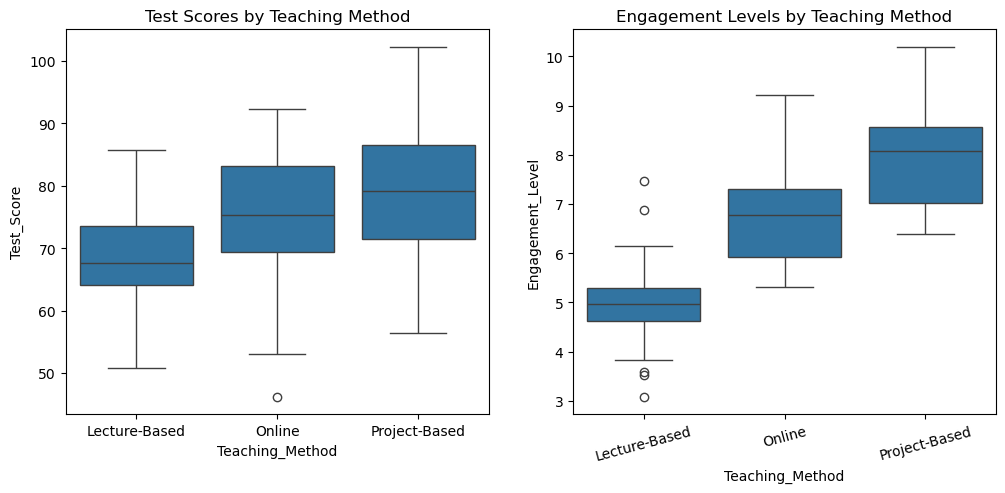

In [11]:
# Boxplots for test scores and engagement levels
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="Teaching_Method", y="Test_Score", data=df, ax=axes[0])
axes[0].set_title("Test Scores by Teaching Method")

sns.boxplot(x="Teaching_Method", y="Engagement_Level", data=df, ax=axes[1])
axes[1].set_title("Engagement Levels by Teaching Method")

plt.xticks(rotation=15)
plt.show()


In [13]:
# Perform MANOVA
maov = MANOVA.from_formula("Test_Score + Engagement_Level ~ Teaching_Method", data=df)
print(maov.mv_test())


                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept         Value  Num DF  Den DF  F Value  Pr > F
---------------------------------------------------------------
          Wilks' lambda  0.0374 2.0000 86.0000 1107.5285 0.0000
         Pillai's trace  0.9626 2.0000 86.0000 1107.5285 0.0000
 Hotelling-Lawley trace 25.7565 2.0000 86.0000 1107.5285 0.0000
    Roy's greatest root 25.7565 2.0000 86.0000 1107.5285 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
      Teaching_Method     Value  Num DF  Den DF  F Value Pr > F
---------------------------------------------------------------
            Wilks' lambda 0.3461 4.0000 172.0000 30.0893 0.0000
           Pillai's trace 0.6543 4.0000 174.0000 21.1512 0.

### **Interpreting the Results**
The MANOVA output provides four different test statistics: Wilks' Lambda, Pillai's Trace, Hotelling's Trace, and Roy's Largest Root. The most commonly used is Wilks' Lambda.

**Key Interpretation**:

A small Wilks' Lambda (close to 0) suggests a strong effect of the independent variable (teaching method) on the dependent variables (test score & engagement).
A large p-value (> 0.05) means we fail to reject the null hypothesis, implying that the teaching method does not significantly impact student outcomes.
A small p-value (< 0.05) indicates at least one group differs significantly.

MANOVA test results show that Teaching_Method has a statistically significant effect on the dependent variables (Test_Score and Engagement_Level). Let's break it down:

### **Key Statistics Interpretation**
**Wilks' Lambda (λ)**
- Teaching_Method: 0.3461, F(4, 86) = 30.08, p = 0.0000
- A lower Wilks' Lambda (closer to 0) indicates a stronger effect of Teaching Method on the dependent variables.
- The p-value (0.0000) is less than 0.05, meaning the teaching method has a significant effect.

**Pillai’s Trace**
- Value = 0.6543, p = 0.0000
- This supports the finding that Teaching Method significantly affects student outcomes.

**Hotelling-Lawley Trace**
- Value = 1.8879, p = 0.0000
- Also confirms that at least one teaching method differs significantly.

**Roy’s Largest Root**
- Value = 1.8872, p = 0.0000
- Further supports significant differences among groups.

**Conclusion**
Since all tests show a significant effect (p < 0.05), we reject the null hypothesis, meaning that at least one of the teaching methods has a different effect on student test scores and engagement levels.

**Follow-Up Analysis**
Since  MANOVA results indicate a significant difference, we can perform separate ANOVAs for each dependent variable to pinpoint which outcome is affected.

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA for Test Scores
anova_test = ols("Test_Score ~ Teaching_Method", data=df).fit()
anova_results_test = sm.stats.anova_lm(anova_test, typ=2)
print("ANOVA for Test Scores:")
print(anova_results_test)

# ANOVA for Engagement Levels
anova_engagement = ols("Engagement_Level ~ Teaching_Method", data=df).fit()
anova_results_engagement = sm.stats.anova_lm(anova_engagement, typ=2)
print("\nANOVA for Engagement Levels:")
print(anova_results_engagement)


ANOVA for Test Scores:
                      sum_sq    df         F    PR(>F)
Teaching_Method  1696.478978   2.0  7.832076  0.000745
Residual         9422.384704  87.0       NaN       NaN

ANOVA for Engagement Levels:
                     sum_sq    df          F        PR(>F)
Teaching_Method  130.623317   2.0  70.674333  5.889163e-19
Residual          80.398555  87.0        NaN           NaN


## 1. ANOVA for Test Scores
| Source           | Sum of Squares (SS) | df  | F       | p-value (PR(>F))  |
|-----------------|-------------------|-----|---------|-------------------|
| Teaching Method | 1696.48            | 2   | 7.83    | **0.000745**      |
| Residual (Error)| 9422.38            | 87  | NaN     | NaN               |

- **F(2, 87) = 7.83**, **p = 0.000745**
- Since **p < 0.05**, we **reject the null hypothesis**, meaning that the **teaching method significantly affects test scores**.
- However, ANOVA does not tell us **which teaching methods differ**, so a **post-hoc test (Tukey's HSD)** is needed.

---

## 2. ANOVA for Engagement Levels
| Source           | Sum of Squares (SS) | df  | F       | p-value (PR(>F))  |
|-----------------|-------------------|-----|---------|-------------------|
| Teaching Method | 130.62             | 2   | 70.67   | **5.88e-19**      |
| Residual (Error)| 80.39              | 87  | NaN     | NaN               |

- **F(2, 87) = 70.67**, **p = 5.88e-19 (essentially 0)**
- Since **p < 0.05**, we **reject the null hypothesis**, meaning that **teaching method has an even stronger effect on engagement levels** compared to test scores.

---

## Key Takeaways
1. **Both test scores and engagement levels are significantly affected by the teaching method.**
2. The effect on **engagement levels is much stronger (F = 70.67) than on test scores (F = 7.83)**.
3. We now need **post-hoc tests (Tukey's HSD)** to determine which specific teaching methods differ.

Would you like to proceed with Tukey's post-hoc test to compare pairs of teaching methods? 🚀
